In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

In [27]:
import sys
import os

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)

from perceptron import Perceptron
from perceptron_visualizer import PerceptronVisualizer

In [28]:
boston = fetch_openml(name="boston", version=1, as_frame=True)

In [29]:
df = boston.data
df['Price'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


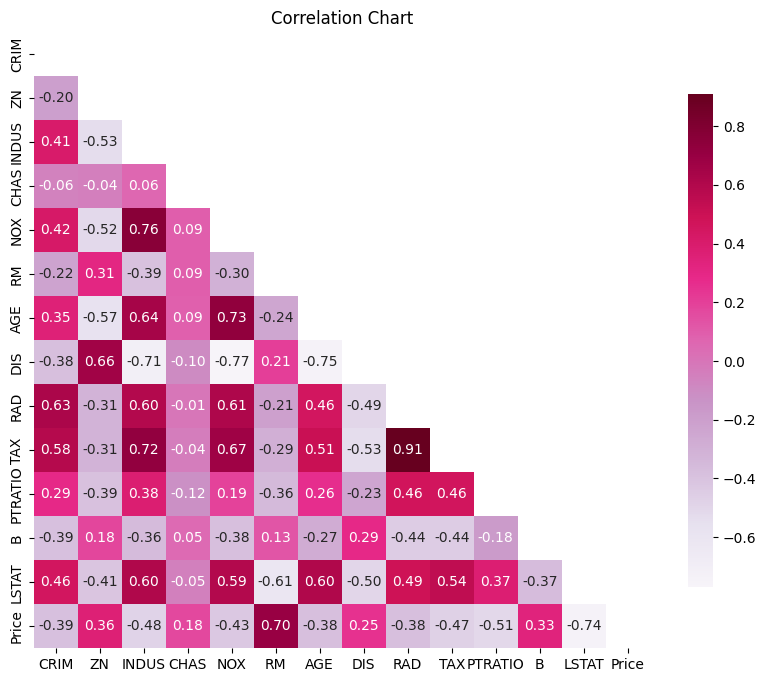

In [30]:
correlation_matrix = df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PuRd', fmt='.2f', mask=mask, square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Chart')
plt.show()

In [31]:
X = df[["RM", "LSTAT"]].values
y = df["Price"].values

In [32]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [33]:
perceptron_model = Perceptron(lr_w=0.001, lr_b=0.001, epochs=100)
perceptron_model.fit(X_train, y_train)

Epoch 1 done. Loss: 3.9039305266308606
Epoch 2 done. Loss: 3.9398886322607223
Epoch 3 done. Loss: 3.94018450224838
Epoch 4 done. Loss: 3.9400575707417484
Epoch 5 done. Loss: 3.9399263976081196
Epoch 6 done. Loss: 3.939795462743807
Epoch 7 done. Loss: 3.9396648134844385
Epoch 8 done. Loss: 3.9395344497181837
Epoch 9 done. Loss: 3.9394043708266504
Epoch 10 done. Loss: 3.9392745761873944
Epoch 11 done. Loss: 3.9391450651792486
Epoch 12 done. Loss: 3.93901583718242
Epoch 13 done. Loss: 3.938886891578458
Epoch 14 done. Loss: 3.938758227750274
Epoch 15 done. Loss: 3.938629845082121
Epoch 16 done. Loss: 3.9385017429596045
Epoch 17 done. Loss: 3.9383739207696613
Epoch 18 done. Loss: 3.938246377900576
Epoch 19 done. Loss: 3.9381191137419718
Epoch 20 done. Loss: 3.937992127684799
Epoch 21 done. Loss: 3.9378654191213416
Epoch 22 done. Loss: 3.937738987445213
Epoch 23 done. Loss: 3.9376128320513537
Epoch 24 done. Loss: 3.937488628776496
Epoch 25 done. Loss: 3.937366327873103
Epoch 26 done. Loss: 3

In [34]:
y_pred = perceptron_model.predict(X_test)

In [35]:
perceptron_model.w

array([[ 5.29642571],
       [-0.85479998]])

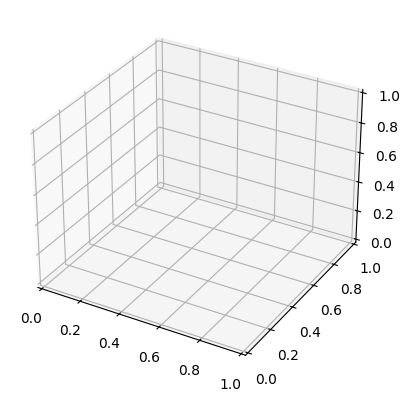

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [36]:
visualizer = PerceptronVisualizer(perceptron_model, X_train, y_train, X_test, y_test, y_pred)
ani = visualizer.animate()